In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/rajeshprabhakar/Desktop/Hackathon/HousePrice Prediction'

/Users/rajeshprabhakar/Desktop/Hackathon/HousePrice Prediction


In [3]:
housetrain=pd.read_csv('train.csv')

In [4]:
housetest=pd.read_csv('test.csv')

In [5]:
housetrain.shape

(1460, 81)

In [6]:
housetest.shape

(1459, 80)

In [10]:
housetest['SalePrice']='test'

In [11]:
combinedf=pd.concat([housetrain,housetest],axis=0)
# axis=0 Row wise Concatenation

In [12]:
combinedf.shape

(2919, 81)

In [13]:
# Split Dataframe into Numeric data & Non Numericdata
objectcols=combinedf.select_dtypes(include=['object'])
numericcols=combinedf.select_dtypes(include=np.number)

In [14]:
print(objectcols.shape)
print(numericcols.shape)

(2919, 44)
(2919, 37)


In [30]:
objectcols.isnull().sum().sort_values(ascending=False)

MSZoning         0
Street           0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Condition2       0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
Foundation       0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
SalePrice        0
dtype: int64

In [31]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   Alley          2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2919 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  RoofStyle      2919 non-null   object
 14  RoofMatl       2919 non-null   object
 15  Exterior1st    2919 non-null   object
 16  Exterior2nd    2919 non-null   object
 17  MasVnrType     2919 non-null   object
 18  ExterQual      2919 non-null

In [17]:
# PoolQC - NA - No Pool
# MiscFeature - No MiscFeature
# Alley - NA  - No Alley Access
# Fence - NA  - No Fence
# FireplaceQu - NA - No Fireplace

In [19]:
notavail=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in notavail:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-19-a92d5cccbbf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [21]:
#GarageCond- No Garage       
#GarageQual- No Garage     
#GarageFinish - No Garage   
#GarageType - No Garage     

In [22]:
garagecols=['GarageCond','GarageQual','GarageFinish','GarageType']
for col in garagecols:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-22-e326a6f5f260>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [24]:
#BsmtCond - No Basement
#BsmtExposure - No Basement
#BsmtQual -- No Basement
#BsmtFinType2 - No Basement
#BsmtFinType1 - No Basement

In [26]:
bsmtcols=['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2',
         'BsmtFinType1']
for col in bsmtcols:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

<ipython-input-26-3d1cbfd6f05e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna('NotAvailable')


In [32]:
objectcols.MasVnrType.value_counts(dropna=False)

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [29]:
for col in objectcols:
    objectcols[col]=objectcols[col].fillna(
    objectcols[col].value_counts().idxmax())

<ipython-input-29-da1126df95ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols[col]=objectcols[col].fillna(


In [37]:
numericcols.isnull().sum().sort_values(ascending=False)

Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [34]:
numericcols.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [35]:
# Impute GarageYrBlt with missing code - 9999
numericcols.GarageYrBlt=numericcols.GarageYrBlt.fillna(9999)

/Users/rajeshprabhakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
for col in numericcols:
    numericcols[col]=numericcols[col].fillna(
    numericcols[col].median())

<ipython-input-36-15ffeabb6bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols[col]=numericcols[col].fillna(


In [38]:
numericcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [40]:
categorycols=numericcols[['OverallQual','OverallCond', 'YearBuilt', 
                          'YearRemodAdd','GarageYrBlt','MoSold', 
                          'YrSold']]

In [41]:
numericcols=numericcols.drop(['OverallQual','OverallCond', 'YearBuilt', 
                          'YearRemodAdd','GarageYrBlt','MoSold', 
                          'YrSold'],axis=1)

In [42]:
print(objectcols.shape)
print(numericcols.shape)
print(categorycols.shape)

(2919, 44)
(2919, 30)
(2919, 7)


In [43]:
numericcols['SalePrice']=objectcols.SalePrice

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [47]:
objectcols=objectcols.drop('SalePrice',axis=1)

In [48]:
objectcolsdummy=objectcols.apply(le.fit_transform)

In [49]:
categorycolsdummy=categorycols.apply(le.fit_transform)

In [50]:
combinedfclean=pd.concat([numericcols,objectcolsdummy,
                         categorycolsdummy],axis=1)

In [51]:
# Split data back to train & test
housetraindf=combinedfclean[combinedfclean.SalePrice!='test']
housetestdf=combinedfclean[combinedfclean.SalePrice=='test']

In [52]:
housetestdf=housetestdf.drop('SalePrice',axis=1)

In [53]:
# Split Data into DependentVariable(y) & Independent Variables (Xs)
y=housetraindf.SalePrice
X=housetraindf.drop(['SalePrice','Id'],axis=1)

In [54]:
housetestdf=housetestdf.drop('Id',axis=1)

<AxesSubplot:>

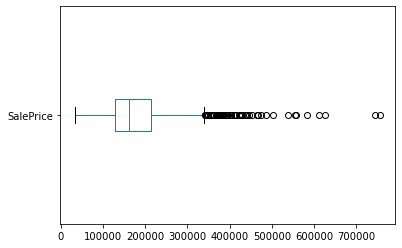

In [55]:
# Check Distrbution and Outliers of SalePrice
y.plot(kind='box',vert=False)

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
linreg=LinearRegression()

In [59]:
linregmodel=linreg.fit(X,y)

In [60]:
linregmodel.score(X,y)

0.853106728035443

In [61]:
regpredict=linregmodel.predict(housetestdf)

In [63]:
pd.DataFrame(regpredict).to_csv('reg.csv')

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
tree=DecisionTreeRegressor()

In [66]:
treemodel=tree.fit(X,y)

In [67]:
treemodel.score(X,y)

1.0

In [68]:
treepredict=treemodel.predict(housetestdf)

In [69]:
pd.DataFrame(treepredict).to_csv('tree.csv')

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
RF=RandomForestRegressor(n_estimators=3000)

In [72]:
RFmodel=RF.fit(X,y)

In [74]:
RFmodel.score(X,y)

0.9818949653773126

In [75]:
Rfpredict=RFmodel.predict(housetestdf)

In [76]:
pd.DataFrame(Rfpredict).to_csv('RF.csv')

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbm=GradientBoostingRegressor(n_estimators=2000)

In [79]:
gbmmodel=gbm.fit(X,y)

In [80]:
gbmmodel.score(X,y)

0.9997657179234075

In [81]:
gbmpredict=gbmmodel.predict(housetestdf)

In [82]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')